In [1]:
# import modules
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy.ma as ma
import numpy as np
%matplotlib inline

In [2]:
file = '/mnt/barboty/equipes/meom/MODEL_SET/NATL60/NATL60LAB-MJM155-S/1d/2007/NATL60LAB-MJM155_y2007m12d30.1d_gridU.nc'

In [24]:
from netCDF4 import Dataset
g = Dataset(file, "r", format="NETCDF4")
NIV = [0]*300

for i in range(300):
    NIV[i] = g.variables['vozocrtx'][0,i,150,:]

len(NIV[1])


942

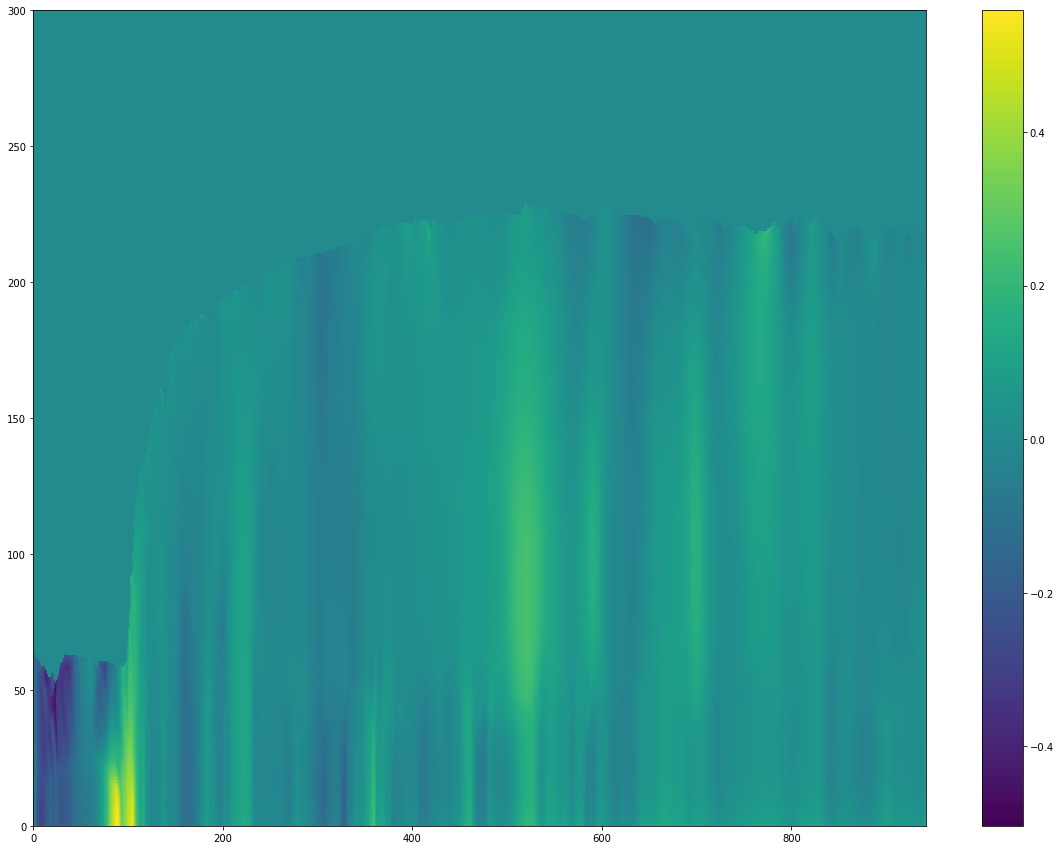

In [4]:
plt.figure(figsize=(20,15))
plt.pcolormesh(ma.masked_invalid(np.squeeze(NIV)))
plt.colorbar()


In [5]:
# Liste des niveaux de profondeur - cellule/cellule

Prof = '/mnt/barboty/equipes/meom/MODEL_SET/NATL60/NATL60LAB-I/NATL60LAB_v4.1_cdf_mesh_zgr.nc'

f = Dataset(Prof, "r", format = "NETCDF4")
q = [0]*300
i=0

for i in range(300):
    
    q[i] = f.variables['e3t'][0,i,150,150]
    
len(q)
Q = np.array(q)

In [6]:
# Création des niveaux de profondeur - Avec les niveaux cellule/cellule

Depth = [0]*300
i=0
for i in range(300):
    if (i == 0):
        Depth[0] = Q[0]
    else:
        Depth[i] = Depth[i-1]+Q[i]

len(Depth)


300

In [27]:
# Création de palliers uniformes

DEPTH = np.array(Depth)
Nd = [0] * 60510

compteurD = 0 #Profondeur
compteurL = 0 #Position dans DEPTH

for i in range(60510):
    
    # print compteurD
    
    if compteurD < 1: #Le premier niveau est à 1m de profondeur
        Nd[i] = NIV[0]
        compteurD += 0.1
        
    elif compteurD == 1:
        Nd[i] = NIV[0]
        compteurL += 1
        compteurD += 0.1
        
    elif compteurD < DEPTH[compteurL]:
        Nd[i] = NIV[compteurL-1]
        compteurD += 0.1
        
    elif compteurD >= DEPTH[compteurL]:
        Nd[i] = NIV[compteurL]
        compteurD += 0.1
        compteurL += 1
    
    # print Nd[i]
# print Nd[60509]

    

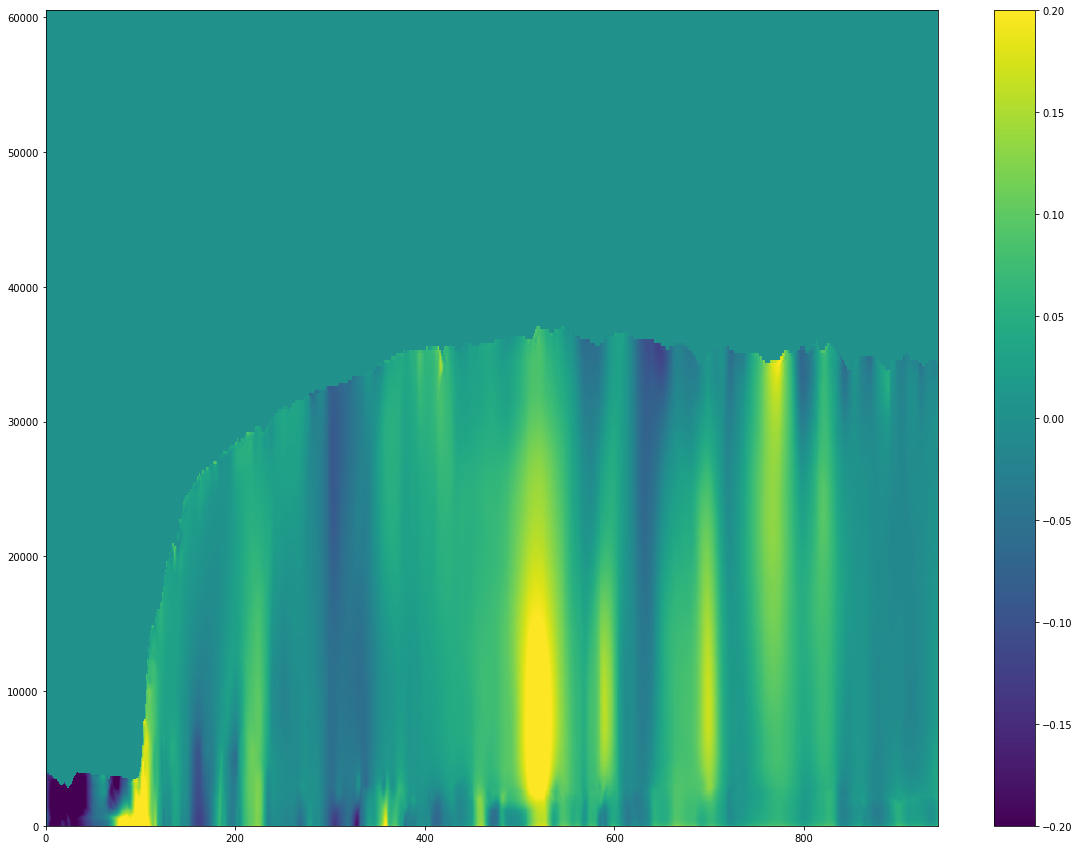

In [40]:
# Coupe à l'endroit

Nd.reverse()

plt.figure(figsize=(20,15))
plt.pcolormesh(ma.masked_invalid(np.squeeze(Nd)),vmin =-0.2, vmax = 0.2)
plt.colorbar()

In [38]:
help(plt.pcolormesh)

Help on function pcolormesh in module matplotlib.pyplot:

pcolormesh(*args, **kwargs)
    Plot a quadrilateral mesh.
    
    Call signatures::
    
      pcolormesh(C)
      pcolormesh(X, Y, C)
      pcolormesh(C, **kwargs)
    
    Create a pseudocolor plot of a 2-D array.
    
    pcolormesh is similar to :func:`~matplotlib.pyplot.pcolor`,
    but uses a different mechanism and returns a different
    object; pcolor returns a
    :class:`~matplotlib.collections.PolyCollection` but pcolormesh
    returns a
    :class:`~matplotlib.collections.QuadMesh`.  It is much faster,
    so it is almost always preferred for large arrays.
    
    *C* may be a masked array, but *X* and *Y* may not.  Masked
    array support is implemented via *cmap* and *norm*; in
    contrast, :func:`~matplotlib.pyplot.pcolor` simply does not
    draw quadrilaterals with masked colors or vertices.
    
    Other Parameters
    ----------------
    cmap : Colormap, optional
        A :class:`matplotlib.colors.Col

In [39]:
help(plt.pyplot.pcolor)

AttributeError: 'module' object has no attribute 'pyplot'